In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import neuron

# Analyse hyper-activity

In [5]:
# Create a dataframe from a base directory

base_directory = '/Volumes/LaCie/LaCie/Gcampf6/ANALYSED/'

gaers = pd.DataFrame()
wistar = pd.DataFrame()

for dirpath, dirnames, filenames in os.walk(base_directory):
    for filename in [f for f in filenames if f.endswith(".csv")]:
        file_path = os.path.join(dirpath, filename)
        df = pd.read_csv(file_path)
        df['experiment'] = filename.split('.')[0]
        if 'gaers' in filename.lower():
            gaers = gaers.append(df)
        elif 'wistar' in filename.lower():
            wistar = wistar.append(df)
        else:
            print(filename)

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
# I have saved the results as one .csv file

# gaers.to_csv('/Users/thomasvuillaume/Work/Dev/neuronDetector/results/gaers20180813.csv')
# wistar.to_csv('/Users/thomasvuillaume/Work/Dev/neuronDetector/results/wistar20180813.csv')

gaers = pd.read_csv('../results/gaers20180813.csv')
wistar = pd.read_csv('../results/wistar20180813.csv')

In [14]:
gaers.describe()

,Unnamed: 0,Volume (pixel^3),Surface (pixel^2),Nb of obj. voxels,Nb of surf. voxels,IntDen,Mean,StdDev,Median,Min,...,Median dist. to surf. (pixel),XM,YM,ZM,BX,BY,BZ,B-width,B-height,B-depth
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,1.696900e+04,16969.0,16969.0,16969.0,16969.0,...,16969.00000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,92.994048,2128.008545,1922.332017,2128.008545,1061.916200,5.426422e+05,255.0,0.0,255.0,255.0,...,10.38038,466.691250,586.775574,127.978078,452.868054,572.601685,121.027167,28.992751,29.221463,16.903766
std,70.673933,2017.150892,1412.529552,2017.150892,792.067242,5.143735e+05,0.0,0.0,0.0,0.0,...,5.42086,287.366077,278.515702,88.311634,287.077067,279.338715,90.766609,21.894299,22.331666,22.653726
min,0.000000,400.000000,400.000000,400.000000,191.000000,1.020000e+05,255.0,0.0,255.0,255.0,...,4.16800,0.492000,0.877000,1.125000,0.000000,0.000000,1.000000,3.000000,3.000000,1.000000
25%,39.000000,710.000000,966.000000,710.000000,504.000000,1.810500e+05,255.0,0.0,255.0,255.0,...,7.14000,216.847000,354.618000,45.434000,203.000000,339.000000,39.000000,17.000000,17.000000,5.000000
50%,80.000000,1328.000000,1460.000000,1328.000000,808.000000,3.386400e+05,255.0,0.0,255.0,255.0,...,8.95600,453.210000,603.965000,121.256000,438.000000,590.000000,117.000000,24.000000,24.000000,9.000000
75%,130.000000,2791.000000,2384.000000,2791.000000,1348.000000,7.117050e+05,255.0,0.0,255.0,255.0,...,11.72900,705.849000,825.937000,202.572000,691.000000,814.000000,197.000000,34.000000,35.000000,16.000000
max,434.000000,9998.000000,13106.000000,9998.000000,7126.000000,2.549490e+06,255.0,0.0,255.0,255.0,...,76.76000,1022.538000,1022.505000,294.998000,1021.000000,1021.000000,295.000000,334.000000,397.000000,295.000000


In [15]:
gaers_stats = neuron.print_stats(gaers)

105 different experiments
16969 detected neurons in total
161.61 neurons per experiment on average

DIV10:
21 experiments
3836 neurons
182.67 neurons per exp

DIV14:
23 experiments
3938 neurons
171.22 neurons per exp

DIV18:
6 experiments
1049 neurons
174.83 neurons per exp

DIV21:
18 experiments
2225 neurons
123.61 neurons per exp

DIV4:
22 experiments
3993 neurons
181.50 neurons per exp

DIV7:
15 experiments
1928 neurons
128.53 neurons per exp



In [16]:
# Summary :
display(gaers_stats)

# display(gaers_stats.plot.pie(y='nb_exp', figsize=(12,12), autopct='%.2f'));
# display(gaers_stats.plot.pie(y='nb_neur', figsize=(12,12), autopct='%.2f'));
# display(gaers_stats.plot.pie(y='nb_neur/nb_exp', figsize=(12,12), autopct='%.2f'));

,nb_exp,nb_neur,nb_neur/nb_exp
DIV10,21.0,3836.0,182.666667
DIV14,23.0,3938.0,171.217391
DIV18,6.0,1049.0,174.833333
DIV21,18.0,2225.0,123.611111
DIV4,22.0,3993.0,181.500000
DIV7,15.0,1928.0,128.533333


In [17]:
wistar_stats = neuron.print_stats(wistar)

99 different experiments
19688 detected neurons in total
198.87 neurons per experiment on average

DIV10:
27 experiments
4835 neurons
179.07 neurons per exp

DIV14:
18 experiments
2961 neurons
164.50 neurons per exp

DIV4:
4 experiments
906 neurons
226.50 neurons per exp

DIV7:
19 experiments
6362 neurons
334.84 neurons per exp

Div18:
31 experiments
4624 neurons
149.16 neurons per exp



In [18]:
# Summary :
display(wistar_stats)

# display(wistar_stats.plot.pie(y='nb_exp', figsize=(12,12), autopct='%.2f'))
# display(wistar_stats.plot.pie(y='nb_neur', figsize=(12,12), autopct='%.2f'))
# display(wistar_stats.plot.pie(y='nb_neur/nb_exp', figsize=(12,12), autopct='%.2f'))

,nb_exp,nb_neur,nb_neur/nb_exp
DIV10,27.0,4835.0,179.074074
DIV14,18.0,2961.0,164.500000
DIV4,4.0,906.0,226.500000
DIV7,19.0,6362.0,334.842105
Div18,31.0,4624.0,149.161290


In [102]:
def get_div(exp_name):
    if 'div4' in exp_name.lower():
        return 4
    if 'div7' in exp_name.lower():
        return 7
    if 'div10' in exp_name.lower():
        return 10
    if 'div14' in exp_name.lower():
        return 14 
    if 'div18' in exp_name.lower():
        return 18 
    if 'div21' in exp_name.lower():
        return 21 

In [128]:
gaers_summary.loc[gaers_summary.experiment == '3GAERSDIV14_2_2', ['nombre de neurones']] = 2

,experiment,nombre de neurones
0,3GAERSDIV14_2_2,2.0


In [132]:
def get_summary(df):
    summary = pd.DataFrame()
    summary['experiment'] = list(set(df.experiment))
    summary['nombre de neurones'] = np.zeros(len(summary.experiment))
    summary['DIV'] = np.zeros(len(summary.experiment))
    for exp in summary.experiment:
        summary.loc[summary.experiment == exp, ['nombre de neurones']] = len(df[df.experiment == exp])
        summary.loc[summary.experiment == exp, ['DIV']] = get_div(exp)
    return summary

In [161]:
gaers_summary = get_summary(gaers)
gaers_summary['souche'] = 'gaers'
wistar_summary = get_summary(wistar)
wistar_summary['souche'] = 'wistar'
summary = pd.concat([gaers_summary[gaers_summary.DIV != 21] , wistar_summary], keys=['gaers', 'summary'])

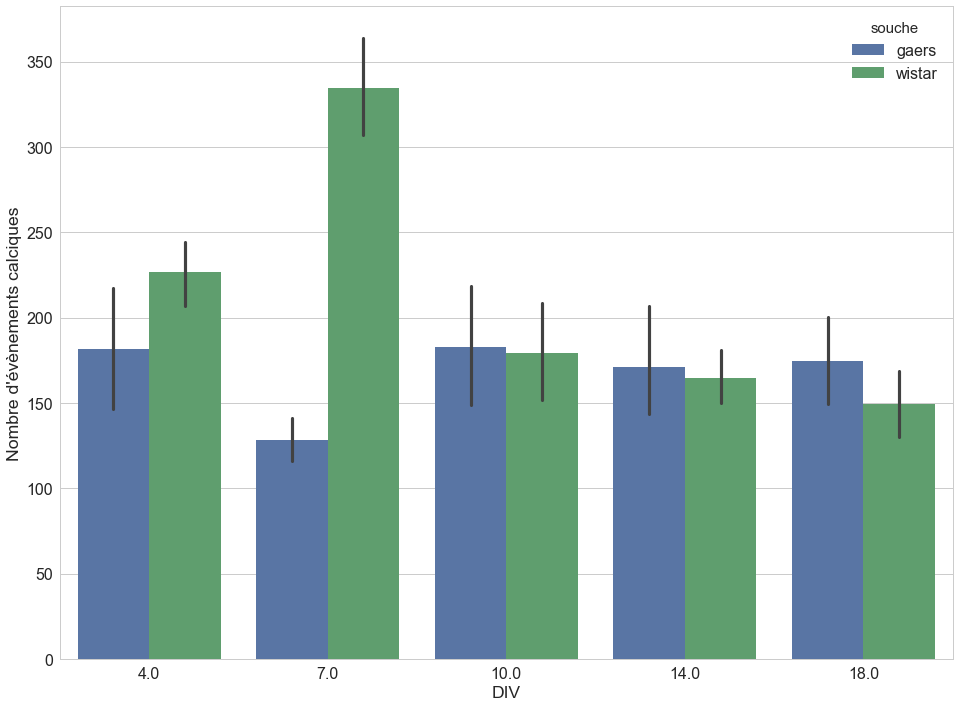

In [189]:
sns.set(font_scale=1.6)
sns.set_style("whitegrid")
plt.figure(figsize=(16,12))
ax = sns.barplot(x='DIV', y='nombre de neurones', data=summary, hue="souche")
ax.set(ylabel="Nombre d'évènements calciques")
plt.savefig('../results/barplot_nombe_event.png')

In [76]:
divs = [g.replace('DIV', '') for g in gaers_stats.index]
divs[3] = '04'
divs[4] = '07'
gaers_stats['DIV'] = divs

In [77]:
gaers_stats.sort_index(by='DIV')

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,nb_exp,nb_neur,nb_neur/nb_exp,stade,DIV
DIV4,22.0,3993.0,181.500000,DIV4,04
DIV7,15.0,1928.0,128.533333,DIV7,07
DIV10,21.0,3836.0,182.666667,DIV10,10
DIV14,23.0,3938.0,171.217391,DIV14,14
DIV18,6.0,1049.0,174.833333,DIV18,18


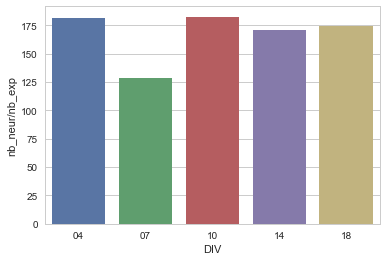

In [78]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x='DIV', y='nb_neur/nb_exp', data=gaers_stats, ci='sd')
# ax = sns.barplot(x=wistar_stats.index, y='nb_neur/nb_exp', data=wistar_stats, ci='sd', ax=ax)

In [88]:
gaers.describe()

,Unnamed: 0,Volume (pixel^3),Surface (pixel^2),Nb of obj. voxels,Nb of surf. voxels,IntDen,Mean,StdDev,Median,Min,...,Median dist. to surf. (pixel),XM,YM,ZM,BX,BY,BZ,B-width,B-height,B-depth
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,1.696900e+04,16969.0,16969.0,16969.0,16969.0,...,16969.00000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,92.994048,2128.008545,1922.332017,2128.008545,1061.916200,5.426422e+05,255.0,0.0,255.0,255.0,...,10.38038,466.691250,586.775574,127.978078,452.868054,572.601685,121.027167,28.992751,29.221463,16.903766
std,70.673933,2017.150892,1412.529552,2017.150892,792.067242,5.143735e+05,0.0,0.0,0.0,0.0,...,5.42086,287.366077,278.515702,88.311634,287.077067,279.338715,90.766609,21.894299,22.331666,22.653726
min,0.000000,400.000000,400.000000,400.000000,191.000000,1.020000e+05,255.0,0.0,255.0,255.0,...,4.16800,0.492000,0.877000,1.125000,0.000000,0.000000,1.000000,3.000000,3.000000,1.000000
25%,39.000000,710.000000,966.000000,710.000000,504.000000,1.810500e+05,255.0,0.0,255.0,255.0,...,7.14000,216.847000,354.618000,45.434000,203.000000,339.000000,39.000000,17.000000,17.000000,5.000000
50%,80.000000,1328.000000,1460.000000,1328.000000,808.000000,3.386400e+05,255.0,0.0,255.0,255.0,...,8.95600,453.210000,603.965000,121.256000,438.000000,590.000000,117.000000,24.000000,24.000000,9.000000
75%,130.000000,2791.000000,2384.000000,2791.000000,1348.000000,7.117050e+05,255.0,0.0,255.0,255.0,...,11.72900,705.849000,825.937000,202.572000,691.000000,814.000000,197.000000,34.000000,35.000000,16.000000
max,434.000000,9998.000000,13106.000000,9998.000000,7126.000000,2.549490e+06,255.0,0.0,255.0,255.0,...,76.76000,1022.538000,1022.505000,294.998000,1021.000000,1021.000000,295.000000,334.000000,397.000000,295.000000


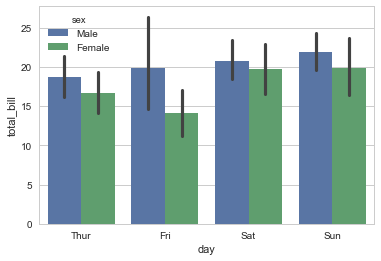

In [67]:
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


# Analyse hyper-synchrony

In [2]:

# base_directory = '/Volumes/LaCie/LaCie/Gcampf6/ANALYSED/'
base_directory = '../Data/'

limits = [1.1, 1.3, 1.5]

gaers_list = []
wistar_list = []

for dirpath, dirnames, filenames in os.walk(base_directory):
    for filename in [f for f in filenames if f.endswith(".tif") and 'objects_map' not in f]:
        file_path = os.path.join(dirpath, filename)
        print(file_path)
        video = neuron.get_signal(file_path)
        nb_events = []
        for limit in limits:
            nb, position = neuron.find_events(video, limit=limit)
            nb_events.append(nb)
            
        print("{} évènements pour limites {}".format(nb_events, limits))
        if 'gaers' in file_path.lower():
            gaers_list.append([os.path.basename(file_path), nb_events])
        if 'wistar' in file_path.lower():
            wistar_list.append([os.path.basename(file_path), nb_events])

with open("../results/gaers_events.pickle", mode='wb') as file:
    pickle.dump(gaers_list, file)
with open("../results/wistar_events.pickle", mode='wb') as file:
    pickle.dump(wistar_list, file)

../Data/WistarDIV4_3_3.tif
[1, 0, 0] évènements pour limites [1.1, 1.3, 1.5]
../Data/WistarDIV4_3_4.tif
[1, 0, 0] évènements pour limites [1.1, 1.3, 1.5]
../Data/GAERSDIV4_1_3.tif
[0, 0, 0] évènements pour limites [1.1, 1.3, 1.5]
../Data/small.tif
[0, 0, 0] évènements pour limites [1.1, 1.3, 1.5]


In [2]:
# check re-load file
gaers_list = pickle.load(open("../results/gaers_events.pickle", "rb"))
wistar_list = pickle.load(open("../results/wistar_events.pickle", "rb"))
print("{} gaers files".format(len(gaers_list)))
print("{} wistar files".format(len(wistar_list)))

118 gaers files
115 wistar files


In [3]:
limits = [1.1, 1.3, 1.5]

gaers_synchro = pd.DataFrame()
wistar_synchro = pd.DataFrame()
gaers_synchro['names'] = [g[0] for g in gaers_list]
wistar_synchro['names'] = [w[0] for w in wistar_list]
for ii, l in enumerate(limits):
    gaers_synchro[l] = [g[1][ii] for g in gaers_list]
    wistar_synchro[l] = [g[1][ii] for g in wistar_list]

In [4]:
gaers_synchro.describe()

,1.1,1.3,1.5
count,118.000000,118.000000,118.000000
mean,1.779661,0.364407,0.093220
std,1.623206,0.747249,0.345602
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000
max,11.000000,3.000000,2.000000


In [5]:
wistar_synchro.describe()

,1.1,1.3,1.5
count,115.000000,115.000000,115.000000
mean,2.904348,0.765217,0.252174
std,1.736976,0.930294,0.559503
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,4.000000,1.000000,0.000000
max,8.000000,3.000000,3.000000


(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

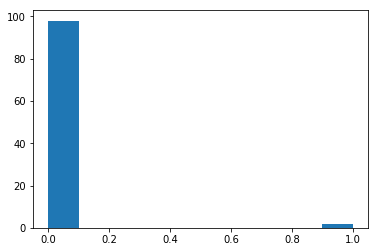

In [8]:
y, bins = plt.hist(n_g)
plt.

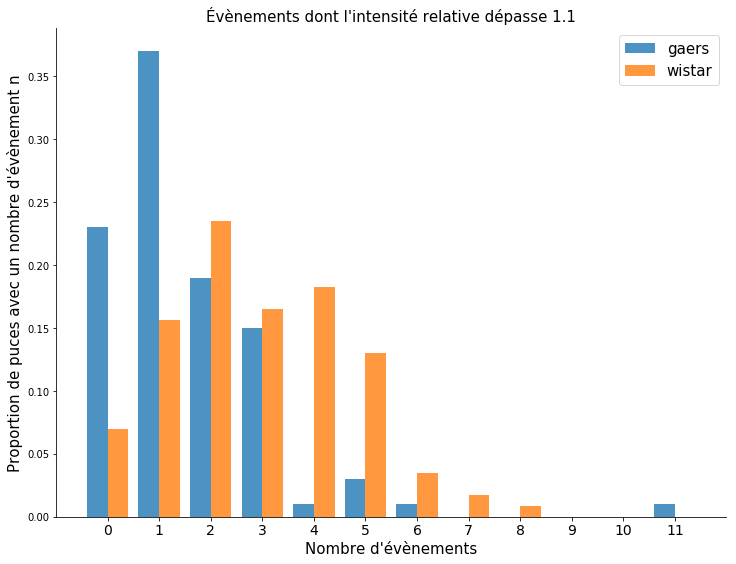

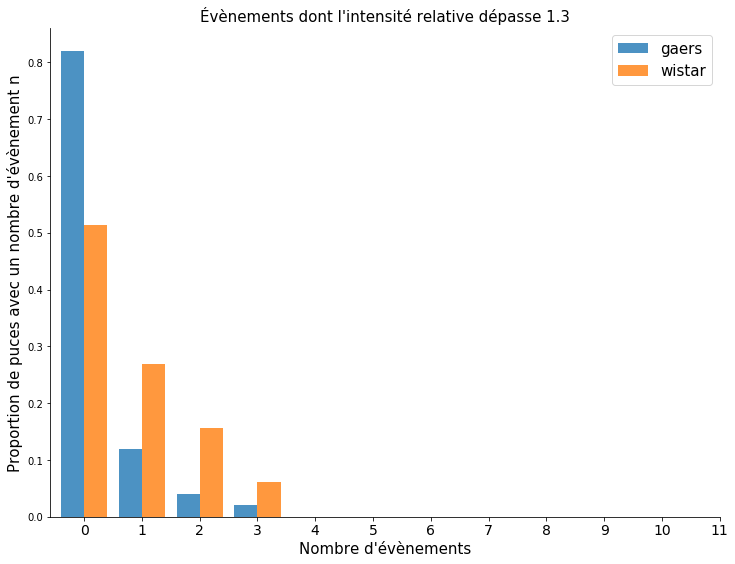

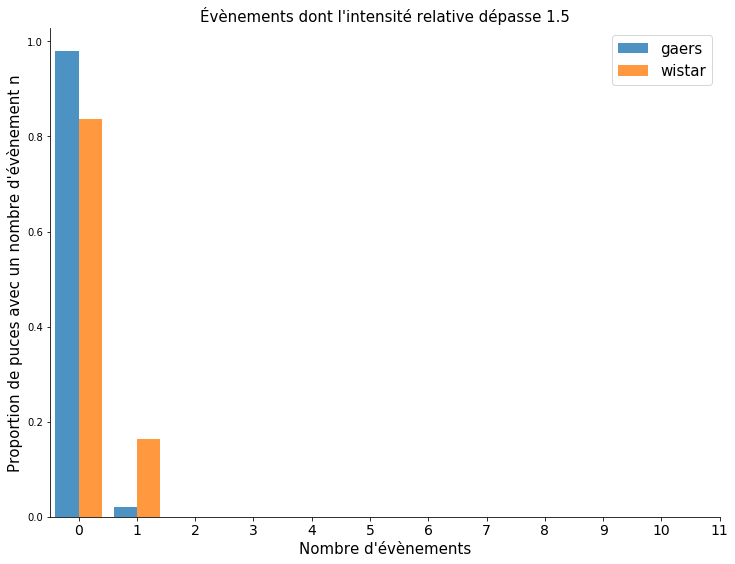

In [11]:
for ii, l in enumerate(limits):

    plt.figure(figsize=(12, 9)) 
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    binwidth = 0.8
    mask = np.array(['21' not in name for name in gaers_synchro.names.values])
    n_g = gaers_synchro.loc[mask][l].values
    
    bins = ax.hist([n_g, wistar_synchro[l].values], 
            range=(0, max(n_g)+1), 
            bins=np.arange(-0.5, max(n_g)+1.5,1), 
            alpha=0.8, 
            label=["gaers", "wistar"], 
            align='mid',
            density=True);

    ax.set_xlabel("Nombre d'évènements", fontsize=15)
    ax.set_ylabel("Proportion de puces avec un nombre d'évènement n", fontsize=15)
    plt.xticks(np.arange(0,12), fontsize=14)
    plt.title("Évènements dont l'intensité relative dépasse {}".format(l), fontsize=15)
    plt.legend(fontsize=15)
    plt.savefig("../results/hist_synchro_{}.png".format(l))
    plt.show()